In [21]:
using Serialization
using DataFrames
using StatsBase
using Statistics
using StatsPlots
using LaTeXStrings
includet("../../lib/commondefs.jl")
pyplot()

Plots.PyPlotBackend()

In [22]:
data = deserialize("cgwalk_bps.jls");

In [23]:
d = DataFrame(groupsz = Int[], group_bps = Float64[], indep_bps = Float64[], mark_bps = Float64[])
for g in 1:10
    gbps = data[g].nmar_b / data[g].nsteps
    ibps = data[g].m0_b / data[g].nsteps
    mbps = data[g].m1_b / data[g].nsteps
    push!(d, (g, gbps, ibps, mbps))
end

In [24]:
g1_bps = filter(x->x.groupsz == 1, d)[:,:mark_bps][1]
offset = g1_bps - 1.0
g2_bps = filter(x->x.groupsz == 2, d)[:,:mark_bps][1]
println("Offset estimate for n=1 is $(offset). This yields an estimate for n=2 of $(g2_bps - offset) bits/step")

Offset estimate for n=1 is 0.07669370766937078. This yields an estimate for n=2 of 0.9320749122253242 bits/step


In [29]:
# The theoretical entropy of the grouped walk, given a groupsize of n
f(n) = -inv(n+1) * log2(inv(n+1)) - n*inv(n+1) * log2(n * inv(n+1))

f (generic function with 1 method)

In [30]:
p1 = plot(legend=:bottomleft, ylabel = bitrate_label, xlabel="States Per Group", dpi=300)
scatter!(p1, d.groupsz, d.indep_bps, label=L"$\tilde{h}^{(1)} = \tilde{h}_\ell^{(0)}$",
               markershape=markov1_shape, color=markov1_col, markerstrokewidth=0.5)
scatter!(p1, d.groupsz, d.group_bps, label=L"$\tilde{h}^{\phantom{(2)}} = \tilde{h}_\ell$", 
               markershape=truedyn_shape, color=truedyn_col, markerstrokewidth=0.5)
scatter!(p1, d.groupsz, d.mark_bps, label=L"$\tilde{h}^{(2)} = \tilde{h}_\ell^{(1)} $", 
               markershape=markov2_shape, color=markov2_col, markerstrokewidth=0.5)
plot!(p1, d.groupsz, [1.0 for _ in d.groupsz], label=L"$h^{(1)} = h_\ell^{(0)}$ [Eq. 2]", 
     color=markov1_col)
plot!(p1, d.groupsz, f.(d.groupsz), label=L"$h^{(2)} = h_\ell^{(1)}$ [Eq. 3]", 
     color=markov2_col);

In [31]:
offset = mean(d.indep_bps .- 1.0)
adjusted_mark2 = d.mark_bps .- offset
adjusted_mark1 = d.indep_bps .- offset
adjusted_truedyn = d.group_bps .- offset

p2 = plot(legend=:bottomleft, #title="CG Rand Walk, Adjusted by Markov Offset", 
        ylabel = bitrate_label, xlabel="States Per Group", dpi=300)
scatter!(d.groupsz, adjusted_mark1, label=L"$\tilde{h}^{(1)}$ [Offset]",
         markershape=markov1_shape, color=markov1_col, markerstrokewidth=0.5)
scatter!(d.groupsz, adjusted_truedyn, label=L"$\tilde{h}^{\phantom{(2)}}$ [Offset]",
        markershape=truedyn_shape, color=truedyn_col, markerstrokewidth=0.5)
scatter!(d.groupsz, adjusted_mark2, label=L"$\tilde{h}^{(2)}$ [Offset]",
         markershape=markov2_shape, color=markov2_col, markerstrokewidth=0.5)
plot!(d.groupsz, [1.0 for _ in d.groupsz], label=L"$\tilde{h}^{(1)}$ [Eq. 2]", 
      color=markov1_col)
plot!(d.groupsz, f.(d.groupsz), label=L"$h^{(2)}$ [Eq. 3]",
      color=markov2_col);

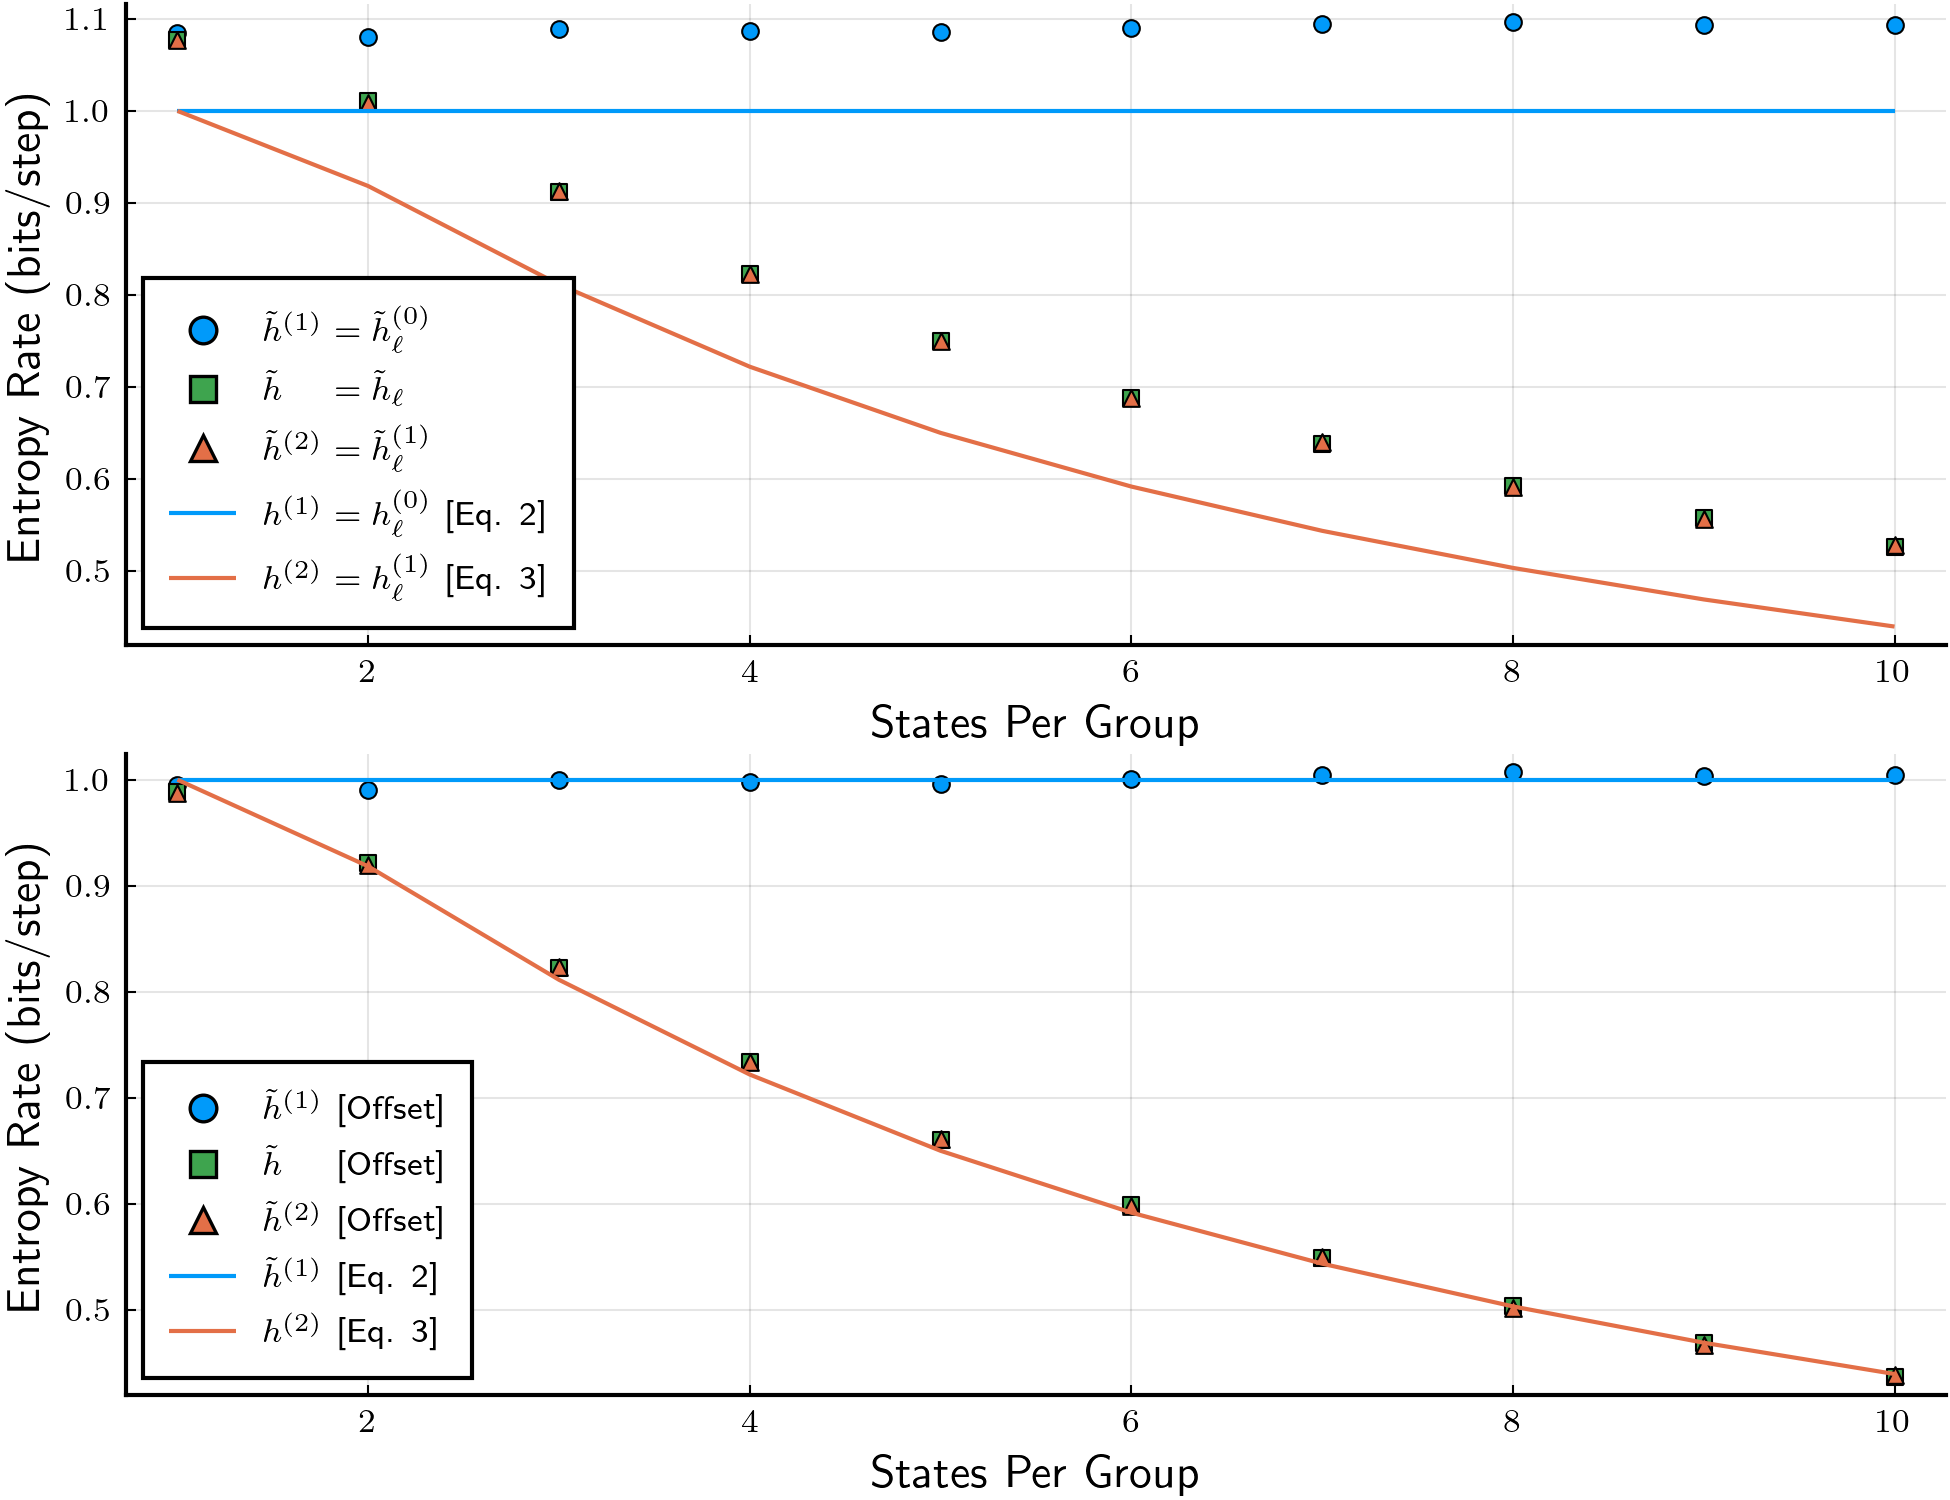

In [28]:
plot(p1, p2, layout=(2,1), dpi=300, size=(650,500))

In [19]:
png("cgwalk_combined.png")